# **ADA 1**
Alumno: Eduardo Patrón Anchondo;  PINNs, FMAT

In [1]:
# Librerias básicas
import numpy as np
import matplotlib.pyplot as plt

# Arquitectura NN
import torch
import torch.nn as nn

# Machine Learning
import sklearn as sk

## **Ejercicio 1: Comparación de diferentes estrategias de ajustes de curvas.**

En este ejercicio se busca comparar diferentes métodos de ajsute de curvas
* Regresión lineal
* Regresión polinómica
* DNNs

#### Datos.
Estos datos se conoce como "Filip", el cual esta diseñado específicamente para probar la estabilidad y presición de los métodos de ajuste polinomial.

In [2]:
data = np.array([
[0.8116,   -6.860120914],
[0.9072,  -4.324130045],
[0.9052,   -4.358625055],
[0.9039,   -4.358426747],
[0.8053,   -6.955852379],
[0.8667,   -6.355462942],
[0.8809,   -6.118102026],
[0.7975,   -7.115148017],
[0.8162,   -6.815308569],
[0.8515,   -6.519993057],
[0.8766,   -6.204119983],
[0.8885,   -5.853871964],
[0.8859,   -6.109523091],
[0.8959,   -5.79832982],
[0.8913,   -5.482672118],
[0.8959,   -5.171791386],
[0.8971,   -4.851705903],
[0.9021,   -4.517126416],
[0.9139,   -3.709075441],
[0.9199,   -3.499489089],
[0.8692,   -6.300769497],
[0.8872,   -5.953504836],
[0.89,     -5.642065153],
[0.891,    -5.031376979],
[0.8977,   -4.680685696],
[0.9035,   -4.329846955],
[0.9078,   -3.928486195],
[0.7675,   -8.56735134],
[0.7705,   -8.363211311],
[0.7713,   -8.107682739],
[0.7736,   -7.823908741],
[0.7775,   -7.522878745],
[0.7841,   -7.218819279],
[0.7971,   -6.920818754],
[0.8329,   -6.628932138],
[0.8641,   -6.323946875],
[0.8804,   -5.991399828],
[0.7668,   -8.781464495],
[0.7633,   -8.663140179],
[0.7678,   -8.473531488],
[0.7697,   -8.247337057],
[0.77,     -7.971428747],
[0.7796,   -7.352812702],
[0.7897,   -7.072065318],
[0.8131,   -6.774174009],
[0.8498,   -6.478861916],
[0.8741,   -6.159517513],
[0.8061,   -6.835647144],
[0.846,    -6.53165267],
[0.8751,   -6.224098421],
[0.8856,   -5.910094889],
[0.8919,   -5.598599459],
[0.8934,   -5.290645224],
[0.894,    -4.974284616],
[0.8957,   -4.64454848],
[0.9047,   -4.290560426],
[0.9129,   -3.885055584],
[0.9209,   -3.408378962],
[0.9219,   -3.13200249],
[0.7739,   -8.726767166],
[0.7681,   -8.66695597],
[0.7665,   -8.511026475],
[0.7703,   -8.165388579],
[0.7702,   -7.886056648],
[0.7761,   -7.588043762],
[0.7809,   -7.283412422],
[0.7961,   -6.995678626],
[0.8253,   -6.691862621],
[0.8602,   -6.392544977],
[0.8809,   -6.067374056],
[0.8301,   -6.684029655],
[0.8664,   -6.378719832],
[0.8834,   -6.065855188],
[0.8898,   -5.752272167],
[0.8964,   -5.132414673],
[0.8963,   -4.811352704],
[0.9074,   -4.098269308],
[0.9119,   -3.66174277],
[0.9228,   -3.2644011],
])

In [3]:
X, y = data[:, 1].reshape(-1,1), data[:,0]
t = np.linspace(X.min(), X.max(), 100)

### Regresión lineal simple.

Este método consta de determinar una recta
$$ \hat{y} = \beta_1x + \beta_0$$
de forma que $\|y_{datos} - \hat{y}\|$ se minima con respecto a MSE.

In [4]:
# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X,y)
y_linear = linear.predict(t.reshape(-1,1))
y_pred = linear.predict(y.reshape(-1,1))

print(f' B1 : {linear.coef_}, B0 : {linear.intercept_}')

# MSE
print(f'MSE: {sum((y - y_pred)**2)/len(y)}')

 B1 : [0.034017], B0 : 1.059118636651358
MSE: 0.05946011233839185


El MSE del método de regresión lineal es de $0.059$.

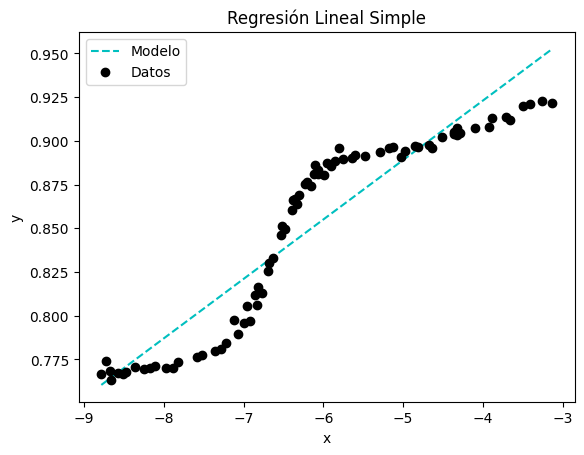

In [5]:
# Regresión Lineal
plt.plot(t, y_linear, '--c', label='Modelo')
plt.plot(X, y.reshape(-1,1), 'ok', label='Datos')

plt.title('Regresión Lineal Simple')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('RegLineal')
plt.show()

El método de *regresión lineal* es simple y fácil de intrepetar. No obstante, no se ajusta bien a los datos. Aunque si sigue la tendencia, las "curvas" no se pueden ajustar ya que, como el nombre indica, el modelo es lineal.

### Regresión polinominal.
Este método consiste en determinar un polinomio, en este caso de grado 10; que minimice el MSE de los datos con respecto al modelo.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10)
X_poly = poly.fit_transform(X)
X_trans = poly.fit_transform(X)
t_poly = poly.fit_transform(t.reshape(-1,1))

poly_reg = linear.fit(X_poly, y)

y_poly = poly_reg.predict(t_poly)
y_pred = poly_reg.predict(X_trans)

# MSE
print(f' MSE: {sum((y - y_pred)**2)/len(y)}')

 MSE: 1.296368937477387e-05


El MSE de este modelo es $1.29\times 10^{-5}$, mucho menor a la línea recta.

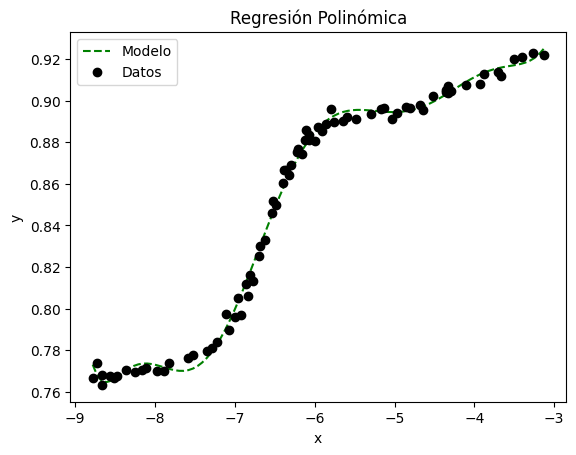

In [7]:
plt.plot(t, y_poly, '--g', label = 'Modelo')
plt.plot(X, y.reshape(-1,1), 'ok', label = 'Datos')

plt.title('Regresión Polinómica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('RegPoly', dpi = 500)
plt.show()

El polinomio ajustado aparaenta se una *buena aproximación* del conjunto de datos. Con un MSE pequeño y con pocas oscilaciones aparentes. Bajo esto, podemos ver una clara mejora con respecto a la regresión lineal.

Sin embargo, es conocido que los polinomios mientras van subiendo de grado tienden a oscilar más en los extremos, lo cual es conocido como *fenómeno de Runge*. Esto implica, que aunque subir el grado del polinomio dio como resultado una mejora, no se puede extender indefinidamente y, cabe mencionar, que tambien depende de la distribución de los datos.

### Regresión por Red Neuronal.

Se propone una arquitectura para comparar con las regresiones. Se propone una arquitectura con tres capas ocultas y una capa de salida. Las primera capa oculta es de 5 neuronas, la segunda y tercera con 4 neuronas cada una. Estas se deslinearizan con la función $\tanh(x)$.

Se toma las hiperparámetros: tasa de aprendizaje de 0.05 y 3000 épocas.

In [8]:
# Red neuronal simple
class SimpleMLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(1,5)
    self.hidden2 = nn.Linear(5,4)
    self.hidden3 = nn.Linear(4,4)
    self.output = nn.Linear(4,1)

  def forward(self, x):
    x = torch.tanh(self.hidden1(x))
    x = torch.tanh(self.hidden2(x))
    x = torch.tanh(self.hidden3(x))
    return self.output(x)

def train_model(x_tensor, y_tensor, epochs = 1000, lr = 0.01):
  # Definir modelo, pérdida y optimizador
  model = SimpleMLP()
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr = lr)

  losses = []

  # Iteraciones de epocas
  for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x_tensor)
    loss = criterion(output, y_tensor)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch == epochs:
      print(f"Epoch {epoch}: Final loss = {loss.item():.6f}")

  return model, losses

In [9]:
# Zona de trabajo

#Datos de entrenamiento (50 pts uniformemente distribuidos)
x_tensor = torch.tensor(X, dtype = torch.float32)
y_tensor = torch.tensor(y.reshape(-1,1), dtype = torch.float32)

model, losses = train_model(x_tensor = x_tensor, y_tensor = y_tensor, epochs = 3000, lr = 0.05)

# Datos de prueba
xI, xF = X.min(), X.max()
x_test = np.linspace(xI, xF, 100)

# Datos de test (predicción del modelo)
x_test_tensor = torch.tensor(x_test, dtype = torch.float32).view(-1,1)
y_test_pred = model(x_test_tensor).detach().numpy()
print(f'MSE final: {losses[-1]}')

MSE final: 1.7849020878202282e-05


Este es un conteo de los errores por épocas del modelo. A sabiendas quela regresión polinomial de grado 10 tiene error de orden $10^{-5}$, se busco una arquitectura que alcance un nivel de precisión similar.

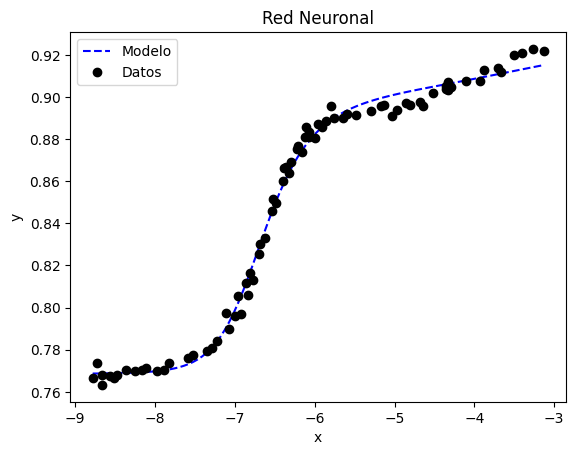

In [10]:
plt.plot(x_test, y_test_pred, '--b', label = 'Modelo')
plt.plot(X, y.reshape(-1,1), 'ok', label = 'Datos')

plt.title('Red Neuronal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('DNNs', dpi = 500)
plt.show()

Se hicieron varios entrenemaientos para asegurar que el modelo si aproxima los datos.

##### Análisis estadísticos de la arquitectura.

Dado que cada modelo de una red neuronal es diferente, porque no conocemos los pesos iniciales. Se propone un análisis estadístico para determinar lo bueno de la arquitectura con respecto a la interpolación polinómica.

In [11]:
# Función de experimento
def run_experiment(epochs=1000, lr=0.01):
    # Entrenamiento
    model, losses = train_model(x_tensor, y_tensor, epochs=epochs, lr=lr)

    x_test_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
    y_test_pred   = model(x_test_tensor).detach().numpy()

    # Calcular error absoluto promedio
    abs_error = np.abs(y - y_test_pred.flatten())
    error = np.mean(abs_error)

    return losses, error

lr = 0.05 # Tasa de aprendizaje
Np  = 100  # Número de pruebas
count = 0

import time

count = 0
best = 0
duracion = np.zeros(Np)

for i in range(Np):
  inicio = time.perf_counter()
  losses, error = run_experiment(epochs=3000, lr=lr)
  fin = time.perf_counter()
  duracion[i] = fin - inicio

  if (losses[-1] < 1e-3):
    count += 1

  if (losses[-1] < 1e-5):
      best += 1


porcentaje = (count / Np) * 100
best = (best/ Np) * 100

duracion = duracion.mean()
minutos = int(duracion // 60)
segundos = duracion % 60

print(f" Porcentaje de exitos: {porcentaje:.2f}%| Mejores que Poly: {best:.2f} | Tiempo de ejecución {segundos:.2f} s")

 Porcentaje de exitos: 94.00%| Mejores que Poly: 47.00 | Tiempo de ejecución 4.51 s


Considerando que una red es buena si tiene un error menor a $10^{-3}$, el 95\% de los modelos son buenos. Por otra parte, como la regresión polinómica tiene un error cercano a $10^{-5}$, 62% de los modelos fueron mejores que esa regresión.

Además, el tiempo promedio de entrenamiento de un modelo es de 3.83 segundos.

### Comparación de los métodos.



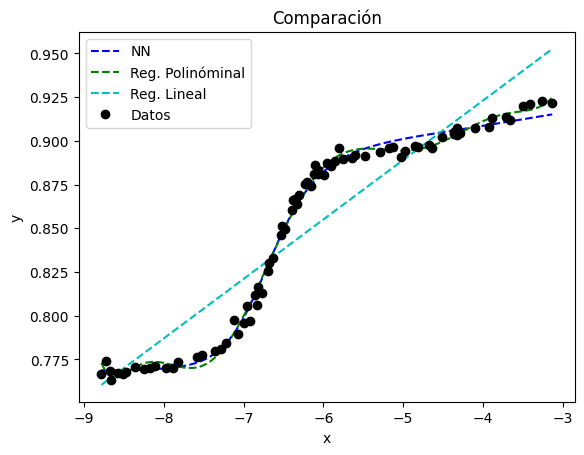

In [12]:
plt.plot(x_test, y_test_pred, '--b', label = 'NN')
plt.plot(t, y_poly, '--g', label = 'Reg. Polinóminal')
plt.plot(t, y_linear, '--c', label = 'Reg. Lineal')

plt.plot(X, y.reshape(-1,1), 'ok', label = 'Datos')

plt.title('Comparación')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('CompReg', dpi = 600)
plt.show()

En la gráfica se visualiza la comparación de los modelos. Claramente, regresión simple es el que menos se ajusta a los datos. Luego, entre regresión polinominal y la red neuronal, cual conocemos que tienen MSE similares, estan cercanos. Sin embargo, se nota que la regresión polinómica tiende a oscilar más, mientras que la red aparenta ser más suave.


En este caso considero que un mejor modelo es la red neuronal, ya que presenta menos oscilaciones que la regresión polinómial.

## **Ejercicio 2**: Aproximación de funciones discontinuas con redes neuronales.

Sea $f:[a,b]\to \mathbb{R}$ una función acotada pero con una discontinuidad. En este ejercicio se explora la capacidad de una red neuronal de una sola capa oculta (funciones de activación sigmoide o ReLU) para aproximar $f$ en normas integrales $(L^1,L^2)$ o de medida.

Para este ejemplo, se considera la función indicadora
$$ f(x) = 1_{[0,1]}(x) $$
definida en [-2,2].

#### **2.1** Generación de los datos.
Se genero definió un \textit{grid} de 200 puntos igualmente espaciados entre $[-2,2]$

In [13]:
# Generación de los datos
N = 200
x = np.linspace(-2,2, N)
x_train = x.reshape(-1,1)

def I(x):
  return ((x>0) & (x<1)).astype(int)

y_train = I(x_train)

# Transformación de datos
x_tensor = torch.tensor(x_train, dtype = torch.float32)
y_tensor = torch.tensor(y_train, dtype = torch.float32)

### **2.2** Modelos y entrenamiento.
En esta sección se construyen dos modelos. La cual se arquitectura se caracteriza por:

* Una red neuronal de una sola capa oculta de 10 neuronas con activación sigmoide.
* Una red con activación ReLU y dos capas ocultas de 5 neuronas cada una.

Nótese que ambos modelos tienen la misma cantidad de neuronas, i.e. la misma cantidad de parámetros. Solo que relacionados de formas diferentes.

Ambos modelos se entrenan con: función de perdida: Error Cuadrático Medio, optimizador: Adam y con 3000 épocas.


In [14]:
# Red Sigmoide
class SigmoideMLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(1,10)
    self.output = nn.Linear(10,1)

  def forward(self, x):
    x = torch.sigmoid(self.hidden1(x))
    return self.output(x)

# Red ReLU
class ReLUMLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(1, 5)
    self.hidden2 = nn.Linear(5, 5)
    self.output = nn.Linear(5,1)

  def forward(self, x):
    x = torch.relu(self.hidden1(x))
    x = torch.relu(self.hidden2(x))
    return self.output(x)

# Función de entrenamiento
def train_model(SimpleMLP, x_tensor, y_tensor, epochs = 3000, lr = 0.01):
  # Definir modelo, pérdida y optimizador
  model = SimpleMLP()
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr = lr)

  losses = []

  # Iteraciones de epocas
  for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x_tensor)
    loss = criterion(output, y_tensor)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch == epochs - 1:
      print(f"Epoch {epoch}: Final loss = {loss.item()}")

  return model, losses

In [15]:
mod_sigmoid, los_sigmoid = train_model(SigmoideMLP , x_tensor, y_tensor)
mod_ReLU, los_ReLU = train_model(ReLUMLP , x_tensor, y_tensor)

Epoch 2999: Final loss = 0.008510773070156574
Epoch 2999: Final loss = 4.734946560347453e-05


Los valores superiores son el **MSE** final de los modelo con Sigmoide y con ReLU, respectivamente. Ambos modelos se entrenaron con la misma cantidad de épocas, 3000.

Abajo, se interpolan en valores más finos; con fin de comparar gráficamente con la función indicadora, $I(t)$.

In [16]:
# Grid
t = np.linspace(-2, 2, 500)
y = I(t).reshape(-1,1)

# Prediciones
t_tensor = torch.tensor(t, dtype = torch.float32).view(-1,1)
y_Sigmoid = mod_sigmoid(t_tensor).detach().numpy()
y_ReLU = mod_ReLU(t_tensor).detach().numpy()

### **2.3** Gráficas de comparación.

En este apartado se busca comparar la función indicadora $I(t)$con las aproximaciones con las redes neuronales. Primeramente, se tiene una gráfica superpuesta de las tres funciones para visualizar las diferencias en la vecindad del salto.

[]

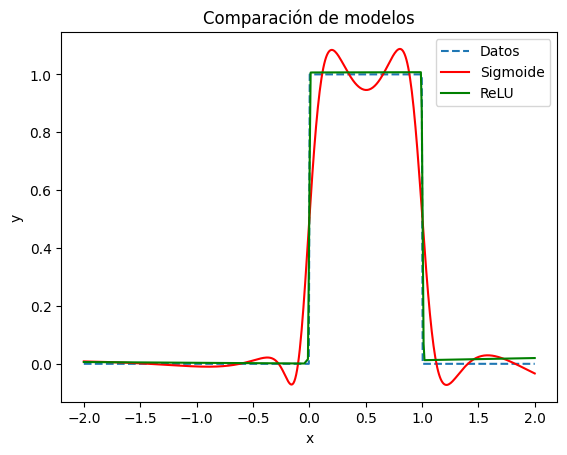

In [17]:
plt.plot(t, y, '--', label = 'Datos')
plt.plot(t, y_Sigmoid, 'r', label = 'Sigmoide')
plt.plot(t, y_ReLU, 'g', label = 'ReLU')

plt.title('Comparación de modelos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('CompDiscontinuio', dpi = 600)
plt.plot()

A primera vista, se ve que la *red ReLU es la que mejor se aproxima* a la indicadora. Esto se puede explicar con que la función de activación ReLU genera aproximaciones en tramos lineales. En cambio la *red Sigmoide muestra oscilaciones* cercano a las discontinuidades, lo que puede ser consecuencia de ser una función suave. Ya que esta característica impide saltos abruptos y esquinas.

La siguiente gráfica muestra el error absoluto de las redes sobre función original.

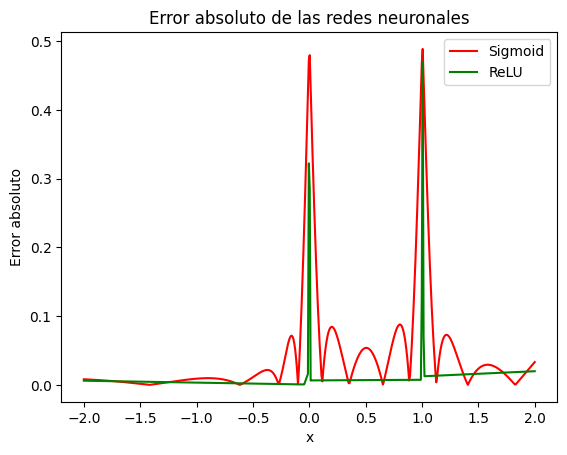

In [18]:
abs_err_sigmoid = np.abs(y_Sigmoid - y)
abs_err_ReLU = np.abs(y_ReLU - y)

# Gráfica de errores absolutos
plt.plot(t, abs_err_sigmoid, '-r', label = 'Sigmoid')
plt.plot(t, abs_err_ReLU, '-g', label = 'ReLU')

plt.title('Error absoluto de las redes neuronales')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.legend()
plt.savefig('ErrorDiscontinuio', dpi = 600)
plt.show()

Bajo los errores absolutos, vemos que la red ReLU concentra los picos de error sobre la discontinuidad. En los otros lados se estabiliza. En contraposición, la red Sigmoide no se estabiliza y cercano a la discontinuidad; además que el error sobre la discontinuidad es mayor a la ReLU.

#### Efecto de tamaño de la red y regularización.
Similar a lo que sucede con los métodos de interpolación tradicionales, las DNNs pueden presentar sobre ajustes y oscilaciones. Estos efectos se buscan controlar con el tamaño de la red y regularización.

Una red pequeña tiene menos capacidad de representar funciones complejas. En cambio, cuando se presentan oscilaciones como en este caso esto impide que se presenten oscilaciones por sobre ajuste de la red en las discontinuidades. Sin embargo, esto viene con un ajuste deficiente en el resto del conjunto.

La regularización es otro forma de impedir un sobre ajuste. El *early stopping* se refiere a tener un número suficiente de épocas antes de que el modelo se sobre ajuste. Mientras que el *weight decay* es penalización a pesos grandes, lo que obliga a la red a producir funciones más suaves y menos oscilatorias.

En los ejemplos, se utilizaron redes pequeñas. Esto promueve menores oscilaciones. Por otra parte, como se uso la misma cantidad de épocas para ambos tal vez eso penalice más la Sigmoide, ya que tal vez necesite menos épocas para tener un buen resultado.

### **2.4** Discusión de los resultados.

Bajo lo antes discutido podemos decir que la red ReLU se aproxima bien a la indicadora. Con un error final bajo, sin oscilaciones del error absoluto y los único picos de error son en las discontinuidades. En cambio, la red Sigmoide presenta desavenencias. Un erro final mayor, muchas oscilaciones cercanas a las discontinuidades y picos de error más altos.

De esto se puede extraer que la función de ReLU tiene la capacidad de ajustarse bien a discontinuidades marcadas y separadas, útil para clasificadores con conjuntos muy marcados. Por el contrario, la función Sigmoide es suave y, por ello, tiende a oscilar cerca de discontinuidades. Sin embargo, pensando en clasificadores, esta funcionaria bien cuando los conjuntos están mas mezclados, de modo que las oscilaciones optimicen el número de variables necesarias.